In [ ]:
#####################################################################################################################
#Developed by Jonathan Ojeda 13/1/2021 QAAFI UQ
# Code functionalities:
# Scatter plots for photosyntesis curves
#####################################################################################################################

In [1]:
#Importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sqlite3
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import dateutil
import pylab as py
import scipy 
from scipy import stats
import sklearn.metrics
from numpy  import array
import glob
import functools
from functools import reduce
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#get data from licor (just as LICOR exported it!!!!)
data0= pd.read_csv(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\PhExperiment\cleandata.csv')
data = data0[data0.ID != 15]

<ipython-input-1-67b890d436a4>:20: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,


In [2]:
data.ID.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

## Arrange datasets before plotting at rep level

In [3]:
#Creating dataframes to plot at replicate level and removing bad replicates

c1 = data.loc[data['curve'] == 1]
c2 = data.loc[data['curve'] == 2]

c1_19935 = c1.loc[c1['cultivar'] == 'MC_19935']

c1_19499b = c1.loc[c1['cultivar'] == 'MC_19499']
c1_19499 = c1_19499b[c1_19499b.rep != 2]

c1_19232b = c1.loc[c1['cultivar'] == 'S_19232']
c1_19232 = c1_19232b[c1_19232b.rep != 3]

c1_19043 = c1.loc[c1['cultivar'] == 'S_19043']
c1_SENTINEL = c1.loc[c1['cultivar'] == 'G_SENTINEL']

c1_HALIFAXe = c1.loc[c1['cultivar'] == 'G_HALIFAX']
c1_HALIFAXd = c1_HALIFAXe[c1_HALIFAXe.rep != 2]
c1_HALIFAXc = c1_HALIFAXd[c1_HALIFAXd.rep != 3]
c1_HALIFAXb = c1_HALIFAXc[c1_HALIFAXc.number != 583]
c1_HALIFAX = c1_HALIFAXb[c1_HALIFAXb.number != 584]

c2_19935 = c2.loc[c2['cultivar'] == 'MC_19935']

c2_19499b = c2.loc[c2['cultivar'] == 'MC_19499']
c2_19499 = c2_19499b[c2_19499b.rep != 2]

c2_19232 = c2.loc[c2['cultivar'] == 'S_19232']
c2_19043 = c2.loc[c2['cultivar'] == 'S_19043']
c2_SENTINEL = c2.loc[c2['cultivar'] == 'G_SENTINEL']
c2_HALIFAX = c2.loc[c2['cultivar'] == 'G_HALIFAX']

## Arrange mean dataset

In [12]:
c1_frames = [c1_19935, c1_19499, c1_19232, c1_19043, c1_SENTINEL, c1_HALIFAX]
meanc1b = pd.concat(c1_frames)
meanc1 = meanc1b.groupby(['cultivar','curve','ID','type'],as_index=False).mean()

c2_frames = [c2_19935, c2_19499, c2_19232, c2_19043, c2_SENTINEL, c2_HALIFAX]
meanc2b = pd.concat(c2_frames)
meanc2 = meanc2b.groupby(['cultivar','curve','ID','type'],as_index=False).mean()

## Plot A vs Ci at rep level

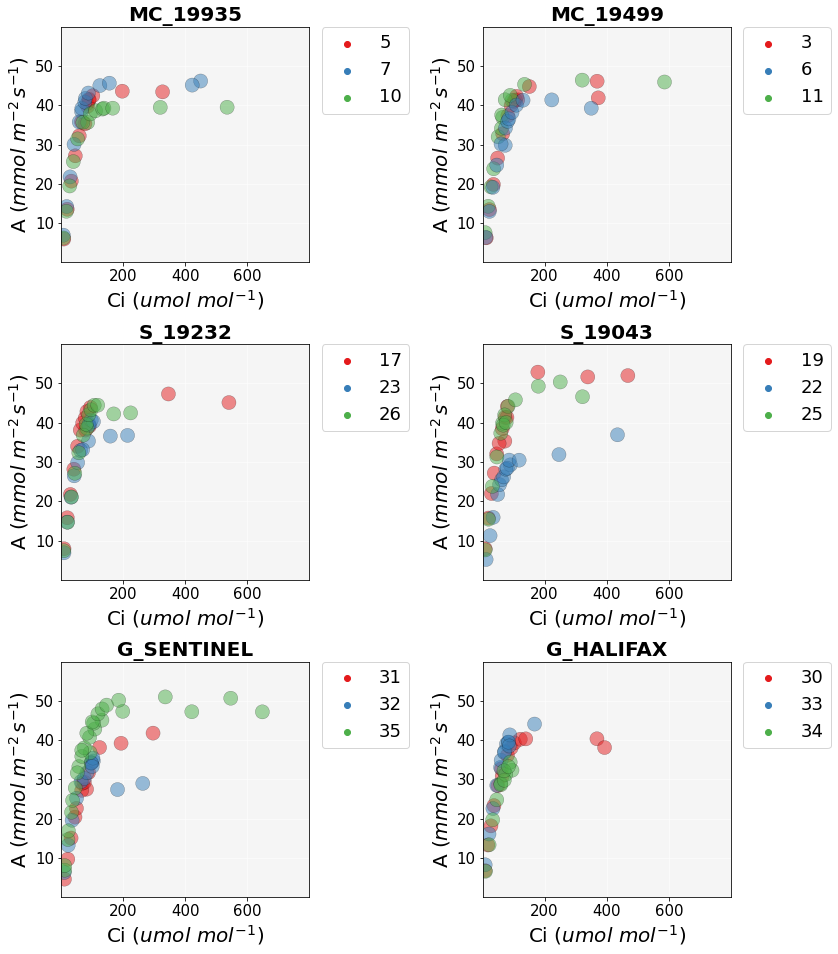

In [4]:
kwargs  =   {'edgecolor':"k"}

fig = plt.figure(figsize=(12,16))

ax=plt.subplot(3, 2, 1)
ax.set_title('MC_19935',fontsize= 20,weight='bold') 
ax.title.set_position([0.5,1.01])
sns.scatterplot(x="Ci", y="A", hue="plot",s=200, alpha=0.5, 
                data=c1_19935, linewidth=0.3, **kwargs, palette="Set1") #palette=color_dict, 
plt.legend(prop=dict(size=18),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('A ($mmol\ m^{-2}\,s^{-1}$)', fontsize =20)
plt.xlabel('Ci ($umol\ mol^{-1}$)', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([1,799])
ax.set_ylim([0.1,59.9])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)

ax=plt.subplot(3, 2, 2)
ax.set_title('MC_19499',fontsize= 20,weight='bold') 
ax.title.set_position([0.5,1.01])
sns.scatterplot(x="Ci", y="A", hue="plot",s=200, alpha=0.5, 
                data=c1_19499, linewidth=0.3, **kwargs, palette="Set1") #palette=color_dict, 
plt.legend(prop=dict(size=18),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('A ($mmol\ m^{-2}\,s^{-1}$)', fontsize =20)
plt.xlabel('Ci ($umol\ mol^{-1}$)', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([1,799])
ax.set_ylim([0.1,59.9])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)

ax=plt.subplot(3, 2, 3)
ax.set_title('S_19232',fontsize= 20,weight='bold') 
ax.title.set_position([0.5,1.01])
sns.scatterplot(x="Ci", y="A", hue="plot",s=200, alpha=0.5, 
                data=c1_19232, linewidth=0.3, **kwargs, palette="Set1") #palette=color_dict, 
plt.legend(prop=dict(size=18),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('A ($mmol\ m^{-2}\,s^{-1}$)', fontsize =20)
plt.xlabel('Ci ($umol\ mol^{-1}$)', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([1,799])
ax.set_ylim([0.1,59.9])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)

ax=plt.subplot(3, 2, 4)
ax.set_title('S_19043',fontsize= 20,weight='bold') 
ax.title.set_position([0.5,1.01])
sns.scatterplot(x="Ci", y="A", hue="plot",s=200, alpha=0.5, 
                data=c1_19043, linewidth=0.3, **kwargs, palette="Set1") #palette=color_dict, 
plt.legend(prop=dict(size=18),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('A ($mmol\ m^{-2}\,s^{-1}$)', fontsize =20)
plt.xlabel('Ci ($umol\ mol^{-1}$)', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([1,799])
ax.set_ylim([0.1,59.9])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)

ax=plt.subplot(3, 2, 5)
ax.set_title('G_SENTINEL',fontsize= 20,weight='bold') 
ax.title.set_position([0.5,1.01])
sns.scatterplot(x="Ci", y="A", hue="plot",s=200, alpha=0.5, 
                data=c1_SENTINEL, linewidth=0.3, **kwargs, palette="Set1") #palette=color_dict, 
plt.legend(prop=dict(size=18),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('A ($mmol\ m^{-2}\,s^{-1}$)', fontsize =20)
plt.xlabel('Ci ($umol\ mol^{-1}$)', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([1,799])
ax.set_ylim([0.1,59.9])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)

ax=plt.subplot(3, 2, 6)
ax.set_title('G_HALIFAX',fontsize= 20,weight='bold') 
ax.title.set_position([0.5,1.01])
sns.scatterplot(x="Ci", y="A", hue="plot",s=200, alpha=0.5, 
                data=c1_HALIFAX, linewidth=0.3, **kwargs, palette="Set1") #palette=color_dict, 
plt.legend(prop=dict(size=18),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('A ($mmol\ m^{-2}\,s^{-1}$)', fontsize =20)
plt.xlabel('Ci ($umol\ mol^{-1}$)', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([1,799])
ax.set_ylim([0.1,59.9])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)

plt.subplots_adjust(wspace=0.7, hspace=0.35)
#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\PhExperiment\AvsCi.png', dpi=300, bbox_inches='tight', pad_inches=0)

## Plot A vs Q at rep level

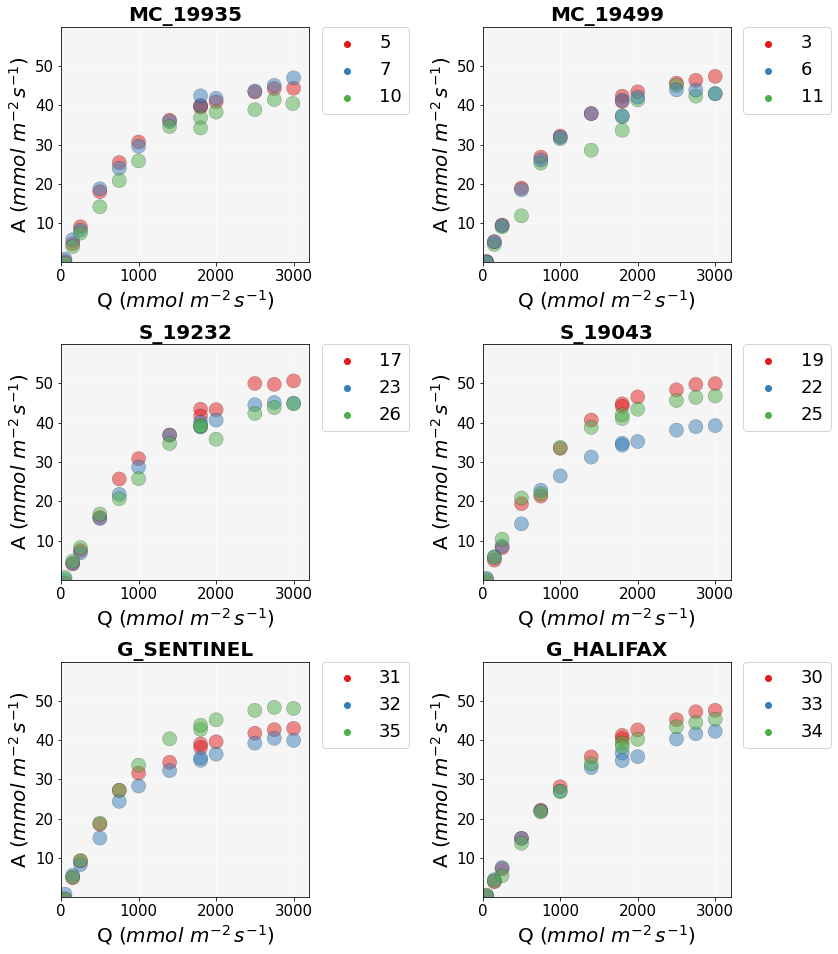

In [5]:
kwargs  =   {'edgecolor':"k"}

fig = plt.figure(figsize=(12,16))

ax=plt.subplot(3, 2, 1)
ax.set_title('MC_19935',fontsize= 20,weight='bold') 
ax.title.set_position([0.5,1.01])
sns.scatterplot(x="Q", y="A", hue="plot",s=200, alpha=0.5, 
                data=c2_19935, linewidth=0.3, **kwargs, palette="Set1")
plt.legend(prop=dict(size=18),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('A ($mmol\ m^{-2}\,s^{-1}$)', fontsize =20)
plt.xlabel('Q ($mmol\ m^{-2}\,s^{-1}$)', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0,3200])
ax.set_ylim([0.1,59.9])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)

ax=plt.subplot(3, 2, 2)
ax.set_title('MC_19499',fontsize= 20,weight='bold') 
ax.title.set_position([0.5,1.01])
sns.scatterplot(x="Q", y="A", hue="plot",s=200, alpha=0.5, 
                data=c2_19499, linewidth=0.3, **kwargs, palette="Set1") #palette=color_dict, 
plt.legend(prop=dict(size=18),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('A ($mmol\ m^{-2}\,s^{-1}$)', fontsize =20)
plt.xlabel('Q ($mmol\ m^{-2}\,s^{-1}$)', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0,3200])
ax.set_ylim([0.1,59.9])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)

ax=plt.subplot(3, 2, 3)
ax.set_title('S_19232',fontsize= 20,weight='bold') 
ax.title.set_position([0.5,1.01])
sns.scatterplot(x="Q", y="A", hue="plot",s=200, alpha=0.5, 
                data=c2_19232, linewidth=0.3, **kwargs, palette="Set1") #palette=color_dict, 
plt.legend(prop=dict(size=18),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('A ($mmol\ m^{-2}\,s^{-1}$)', fontsize =20)
plt.xlabel('Q ($mmol\ m^{-2}\,s^{-1}$)', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0,3200])
ax.set_ylim([0.1,59.9])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)

ax=plt.subplot(3, 2, 4)
ax.set_title('S_19043',fontsize= 20,weight='bold') 
ax.title.set_position([0.5,1.01])
sns.scatterplot(x="Q", y="A", hue="plot",s=200, alpha=0.5, 
                data=c2_19043, linewidth=0.3, **kwargs, palette="Set1") #palette=color_dict, 
plt.legend(prop=dict(size=18),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('A ($mmol\ m^{-2}\,s^{-1}$)', fontsize =20)
plt.xlabel('Q ($mmol\ m^{-2}\,s^{-1}$)', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0,3200])
ax.set_ylim([0.1,59.9])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)

ax=plt.subplot(3, 2, 5)
ax.set_title('G_SENTINEL',fontsize= 20,weight='bold') 
ax.title.set_position([0.5,1.01])
sns.scatterplot(x="Q", y="A", hue="plot",s=200, alpha=0.5, 
                data=c2_SENTINEL, linewidth=0.3, **kwargs, palette="Set1") #palette=color_dict, 
plt.legend(prop=dict(size=18),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('A ($mmol\ m^{-2}\,s^{-1}$)', fontsize =20)
plt.xlabel('Q ($mmol\ m^{-2}\,s^{-1}$)', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0,3200])
ax.set_ylim([0.1,59.9])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)

ax=plt.subplot(3, 2, 6)
ax.set_title('G_HALIFAX',fontsize= 20,weight='bold') 
ax.title.set_position([0.5,1.01])
sns.scatterplot(x="Q", y="A", hue="plot",s=200, alpha=0.5, 
                data=c2_HALIFAX, linewidth=0.3, **kwargs, palette="Set1") #palette=color_dict, 
plt.legend(prop=dict(size=18),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('A ($mmol\ m^{-2}\,s^{-1}$)', fontsize =20)
plt.xlabel('Q ($mmol\ m^{-2}\,s^{-1}$)', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0,3200])
ax.set_ylim([0.1,59.9])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)

plt.subplots_adjust(wspace=0.7, hspace=0.35)
#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\PhExperiment\AvsQ.png', dpi=300, bbox_inches='tight', pad_inches=0)

## Plot A vs Ci and A vs Q (means)

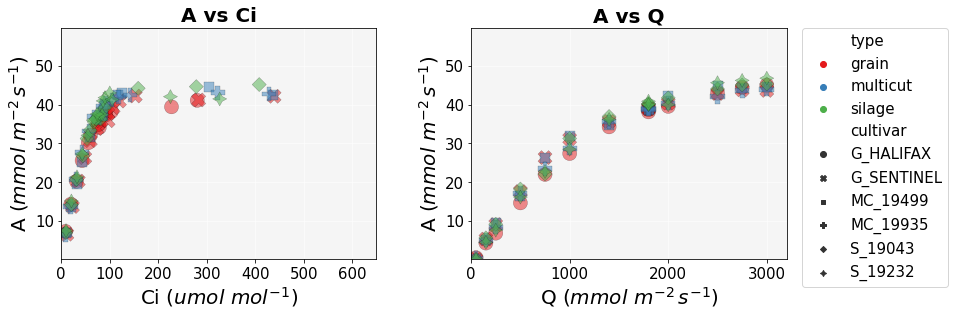

In [13]:
kwargs  =   {'edgecolor':"k"}

fig = plt.figure(figsize=(13,10))

ax=plt.subplot(2, 2, 1)
ax.set_title('A vs Ci',fontsize= 20,weight='bold') 
ax.title.set_position([0.5,1.01])
sns.scatterplot(x="Ci", y="A", hue="type",style='cultivar', s=200, alpha=0.5, 
                data=meanc1, linewidth=0.3, **kwargs, palette="Set1") #palette=color_dict, 
plt.legend(prop=dict(size=15),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('A ($mmol\ m^{-2}\,s^{-1}$)', fontsize =20)
plt.xlabel('Ci ($umol\ mol^{-1}$)', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0,650])
ax.set_ylim([0.1,59.9])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)
ax.get_legend().remove()

ax=plt.subplot(2, 2, 2)
ax.set_title('A vs Q',fontsize= 20,weight='bold') 
ax.title.set_position([0.5,1.01])
sns.scatterplot(x="Q", y="A", hue="type", style="cultivar", s=200, alpha=0.5, 
                data=meanc2, linewidth=0.3, **kwargs, palette="Set1") #palette=color_dict, 
plt.legend(prop=dict(size=15),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('A ($mmol\ m^{-2}\,s^{-1}$)', fontsize =20)
plt.xlabel('Q ($mmol\ m^{-2}\,s^{-1}$)', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0,3200])
ax.set_ylim([0.1,59.9])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)

plt.subplots_adjust(wspace=0.3, hspace=0.35)
#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\PhExperiment\means.png', dpi=300, bbox_inches='tight', pad_inches=0)

In [19]:
sentinel.A.unique()

array([35.81701315,  6.4757273 , 13.6309154 , 20.23422331, 26.26473841,
       30.6736501 , 33.76209531, 35.83192554, 37.68864459, 39.17609509,
       40.88928226, 42.20441749, 41.19085092, 42.13552473])

<ipython-input-64-9ef1a747c170>:14: RuntimeWarning: invalid value encountered in log2
  return a*np.log2(b+x)+c


Text(179.97, 15, 'R²=0.902')

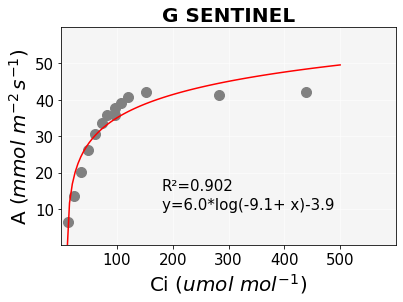

In [64]:
from pylab import *
from scipy.optimize import curve_fit
kwargs  =   {'edgecolor':"k"}

sentinel = meanc1.loc[meanc1['cultivar'] == 'G_SENTINEL']

x =sentinel.Ci.values
y =sentinel.A.values

xmin=0.1
xmax=599.9

def func(x, a, b, c):
    return a*np.log2(b+x)+c

popt, pcov = curve_fit(func, x, y, p0=(1, 1e-6, 1))

xx = np.linspace(0, 500, 100)
yy = func(xx, *popt)

plt.scatter(x, y, label="Observed Data", color='grey', s=100)
plot(xx, yy, color='r', label="Fitted Curve")
plt.xlabel('Ci ($umol\ mol^{-1}$)', fontsize =20)
plt.ylabel('A ($mmol\ m^{-2}\,s^{-1}$)', fontsize =20)

ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([xmin, xmax])
ax.set_ylim([0.1,59.9])
ax.set_title('G SENTINEL',fontsize= 20,weight='bold')

residuals = y- func(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
r2=str(r_squared.round(3))
plt.text(xmax*0.3, 10, 'y=' + str(popt[0].round(1)) + '*log' + '(' + str(popt[1].round(1))+'+ x)' + str(popt[2].round(1)), fontsize=15,color='k')
plt.text(xmax*0.3, 15,'R²='+r2,fontsize=15,color='k')

In [7]:
comp = data.dropna(subset=['ID2']) 
#comp.to_csv(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\PhExperiment\comp.csv')

In [8]:
CO2vsQ = pd.read_csv(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\PhExperiment\CO2vsQ.csv')

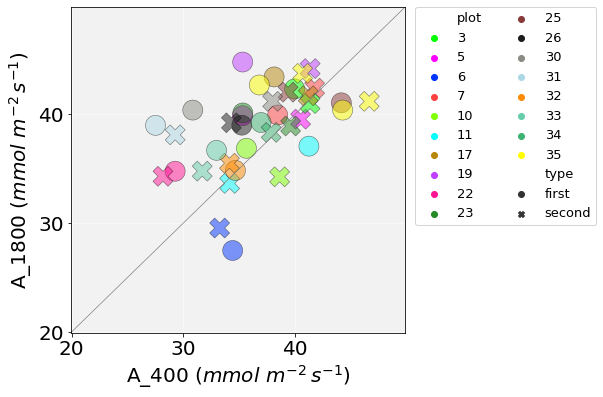

In [9]:
AllColors = ['#00FF00',
 '#FF00FF',
 '#0033FF',
 '#FF4040',
 '#7FFF00',
 '#00FFFF',
 '#B8860B',
 '#BF3EFF',
 '#FF1493',
 '#228B22',
 '#8B3A3A',
 '#1C1C1C',
 '#8B8B83',
 '#ADD8E6',
 '#FF8C00',
 '#66CDAA',
 '#3CB371',
 'yellow']

fig = plt.figure(figsize=(6,6))

ax=plt.subplot(1, 1, 1)

sns.scatterplot(x="A_CO2", y="A_Q", hue="plot", style = 'type', alpha=0.5, data=CO2vsQ,
                linewidth=0.6,**kwargs,s=400,palette=AllColors)
plt.plot([0,70],[0,70],"-",color="grey", linewidth=0.7)

# Formatting graph and background
plt.legend(prop=dict(size=13),bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0., ncol=2)
plt.ylabel('A_1800 ($mmol\ m^{-2}\,s^{-1}$)', fontsize =20)
plt.xlabel('A_400 ($mmol\ m^{-2}\,s^{-1}$)', fontsize =20)
#plt.text(50, 4.4, 'b',fontsize=30,color='k',weight='bold')
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.95')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([19.9,49.9])
ax.set_ylim([19.9,49.9])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\PhExperiment\CO2vsQ.png', dpi=300, bbox_inches='tight', pad_inches=0)